In [ ]:
# Simple Neural Network – Classification

This notebook demonstrates a basic deep learning workflow using a fully connected neural network (MLP) on the Iris dataset.

It is part of my AI Engineering portfolio aligned with the IBM AI Engineering Professional Certificate.


In [2]:
pip install tensorflow


  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   ------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


c:\Users\Hp\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
# Load Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

X.head(), y.value_counts()


(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 Target
 0    50
 1    50
 2    50
 Name: count, dtype: int64)

In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)

y_encoded = encoder.fit_transform(y.values.reshape(-1,1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)


In [7]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in Iris
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323 (1.26 KB)

 Trainable params: 323 (1.26 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5833 - loss: 1.0692 - val_accuracy: 0.4583 - val_loss: 1.1346
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6458 - loss: 1.0249 - val_accuracy: 0.4583 - val_loss: 1.0880
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.9840 - val_accuracy: 0.4583 - val_loss: 1.0460
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7083 - loss: 0.9402 - val_accuracy: 0.5000 - val_loss: 1.0050
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7083 - loss: 0.8941 - val_accuracy: 0.5000 - val_loss: 0.9607
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7083 - loss: 0.8444 - val_accuracy: 0.5000 - val_loss: 0.9123
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7083 - loss: 0.7909 - val_accuracy: 0.5000 - val_loss: 0.8653
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7083 - loss: 0.7405 - val_accuracy: 0.5000 - val_loss

In [9]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 1.0000 - loss: 0.0971
Test Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



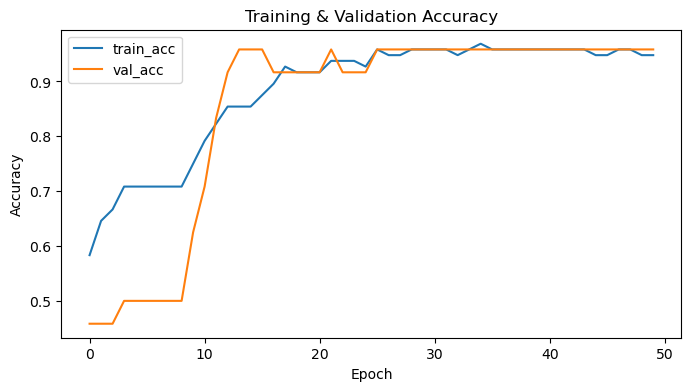

In [10]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
## Conclusion

This notebook demonstrates a complete deep learning workflow using a simple feedforward neural network:

- Feature scaling and one-hot encoding
- Model building with Keras
- Training and evaluation
- Visualization of training progress

It highlights the core principles of neural networks in a clear and minimal implementation suitable for portfolio demonstration.
